# Background

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

Mostly bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

## Problem Definition :

- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Covid pandemic and finding it very difficult to sustain in the current market scenario. 

- The Company has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state

###### BoomBikes wants to understand various factors that can increase bike demands post pandemic and would like to prepare  business strategy.

- The major parameters that are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



###### Buisness Goal:

- Develop a model to predict the variables which are significant for the demand of shared bikes with the available independent   variables.
- To know the accuracy of the model, i.e. how effectively these variables can predict bike demands.
- These variables will be used by the company to understand and manipulate the business strategy to meet the demand levels and   meet the customer's expectations.


# Step 1: Reading and Understanding the Data

    Let's start with the following steps:

    1.Importing data using the pandas library
    2.Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import NumPy and Pandas and read the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [3]:
#Read the day.csv file using pandas
bike_share = pd.read_csv('day.csv')
bike_share

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
# Check the head data
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#check the shape of dataset
bike_share.shape

(730, 16)

In [6]:
#check info of dataset for null values and datatype analysis
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Note : There is no null values which means all the data are relevant/consistent and need not have to fill the null values with average or any assumed business data.

In [7]:
# Summary of Data set
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# size of data
bike_share.size

11680

##### Check for Null or Missing Values

In [9]:
# percentage of missing values in each column
round(100*(bike_share.isnull().sum()/len(bike_share)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [10]:
# row-wise null count percentage
round((bike_share.isnull().sum(axis=1)/len(bike_share))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [11]:
# Finding duplicates and dropping the entire duplicate row if any
bike_share.drop_duplicates(subset=None, inplace=True)

# Shape after dropping duplicates
bike_share.shape

(730, 16)

#### Understanding/Observation of the Dataset from day.csv
 - Dataset has 730 rows and 16 columns.
 - Except one column, all other are either float or integer type. Only "dteday" is neither integer not float
 - seems to be some fields that are categorical in nature, but in integer/float type.
 - There are no Null or Missing values either in columns or rows
 - Shape of the data set didnt change after running drop command, means there is no duplicates

In [12]:
# Visualising the raw dataset before any operation
#sns.pairplot(bike_share)
#plt.show()

# Step2: Cleaning of Bike share Data

#### Removing redundant & unwanted columns

###### Based on the raw data and the data dictionary, the following variables can be removed from further analysis:
- "instant" is just a row instance identifier.
- "dteday" is removed as we have some of date features like mnth and year and weekday already in other columns and also for        this analysis we will not consider day to day trend in demand for bikes.
- "casual and registered" variables are not available at the time of prediction and also these describe the target variable cnt    in a very trivial way target = casual + registered, which leads to data leakage.


In [13]:
# Drop "instant" column as it is index column which is not required
bike_share.drop(['instant'], axis = 1, inplace = True)

In [14]:
# Drop "dteday" as there is already month and weekday available for analysis
bike_share.drop(['dteday'], axis = 1, inplace = True)

In [15]:
# Drop "casual" and "registered" columns as cnt column provides sum of the both casual and registered which is the target column
bike_share.drop(['casual'], axis = 1, inplace = True)
bike_share.drop(['registered'], axis = 1, inplace = True)

In [16]:
# dataset after dropping
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [18]:
# Check correlation between the variables
bike_share.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


It has been observed that the variables season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

#### EXPLORATORY DATA ANALYSIS 

Need to Perfrom EDA on datasets 

In [19]:
# unique values in all columns
bike_share.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

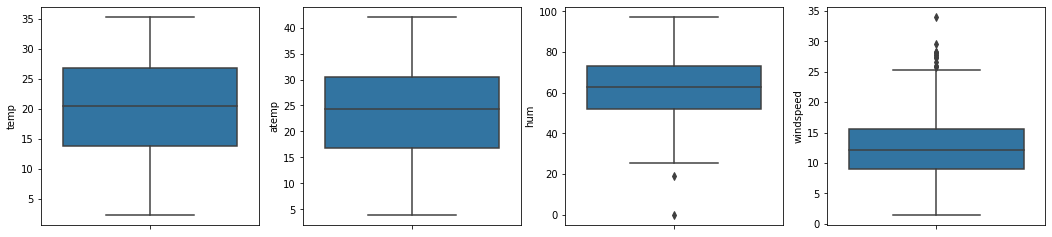

In [20]:
# Box plots for indepent variables with continuous values and outliers analysis
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_share)
    i+=1

Box plots depicts that there are no outliers to be handled

In [21]:
# Convert "season" and weathersit into categorical types
bike_share.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_share.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_share.mnth = bike_share.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_share.weekday = bike_share.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


###### visualisation of Linear relationship

<Figure size 1080x2160 with 0 Axes>

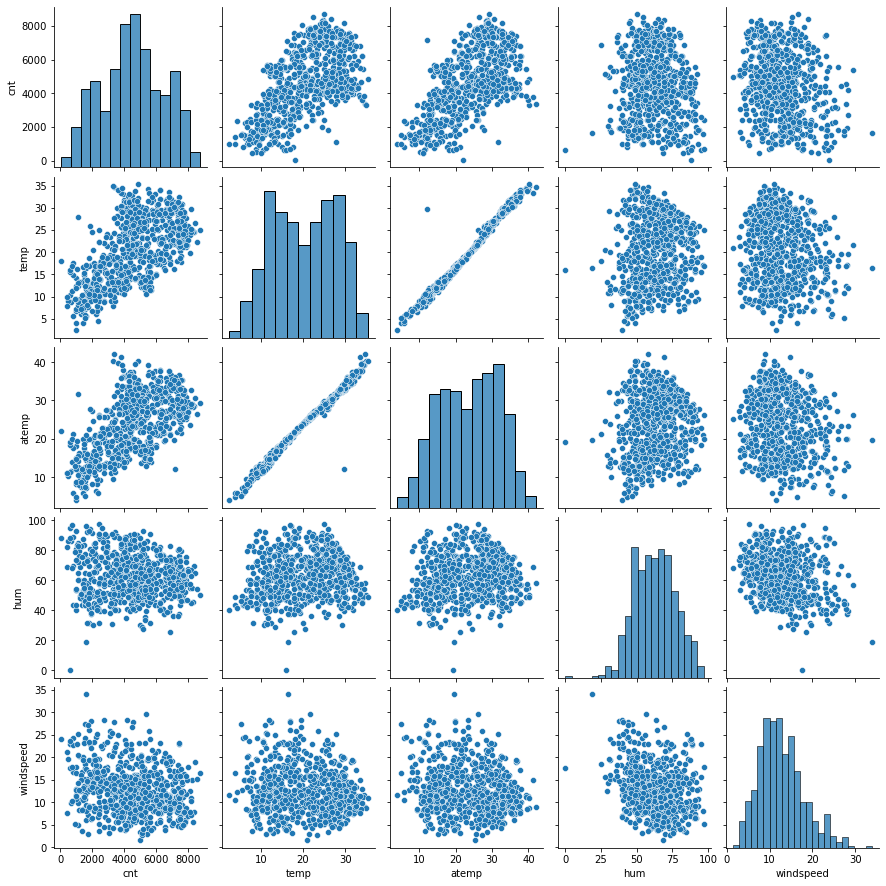

In [22]:
# Data visualisation of continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_share,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

The above Pair-Plot shows that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

In [23]:
# Visualizing Catagorical Variables
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 90.3+ KB


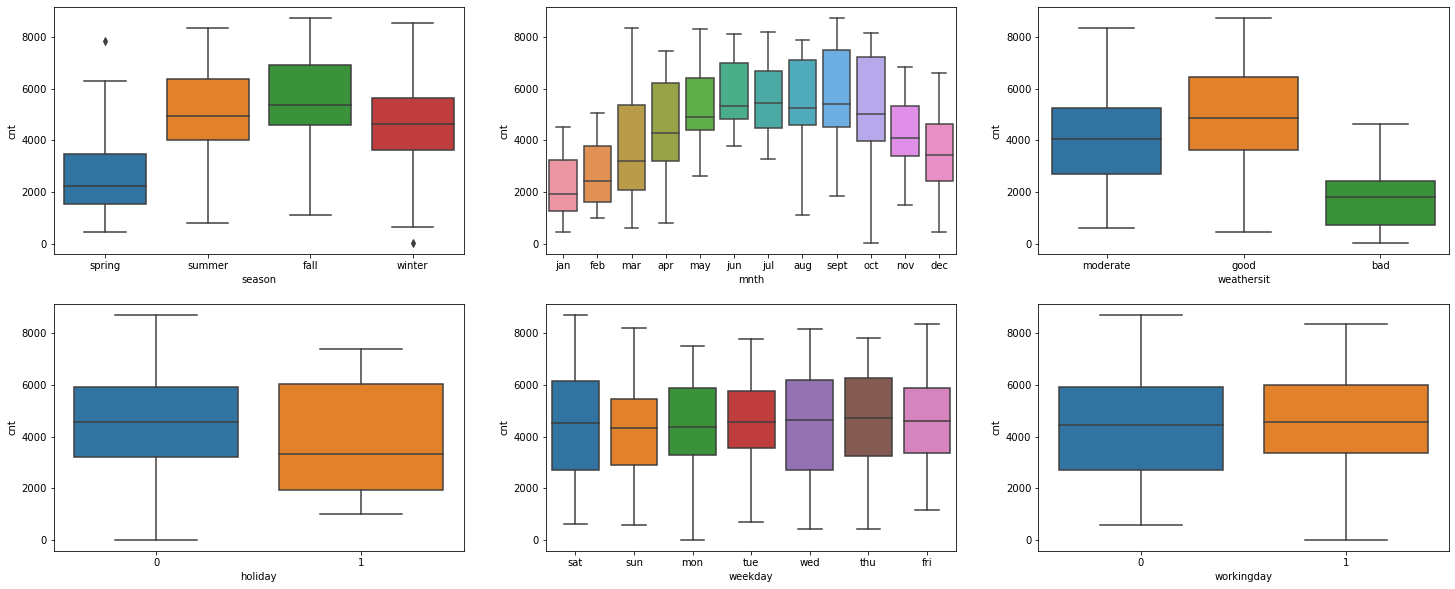

In [24]:
#  Building boxplot of all categorical variables against the target variable 'cnt' to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_share)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share)
plt.show()

###### Catagorical Variables Analysis
There are 6 categorical variables in the dataset.

Box plot (refer the fig above) is used to study their effect on the dependent variable (‘cnt’) .

The inference that could be derive were:

###### season: 
  Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2               years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good           predictor for the dependent variable.

###### mnth: 
  Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month.           This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

###### weathersit: 
  Almost 67% of the bike booking were happening during ‘good weathersit' with a median of close to 5000 booking (for the         period of 2 years). This was followed by 'moderate' with 30% of total booking. This indicates, weathersit does show some       trend towards the bike bookings can be a good predictor for the dependent variable.

###### holiday: 
  Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased.     This     indicates, holiday CANNOT be a good predictor for the dependent variable.

###### weekday: 
  weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their             independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will   let the model decide if this needs to be added or not.

###### workingday: 
  Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the       period of   2 years). This indicates, workingday can be a good predictor for the dependent variable

### Correlation Matrix

In [25]:
#Calculate Correlation
bike_corr = bike_share.corr()
bike_corr

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


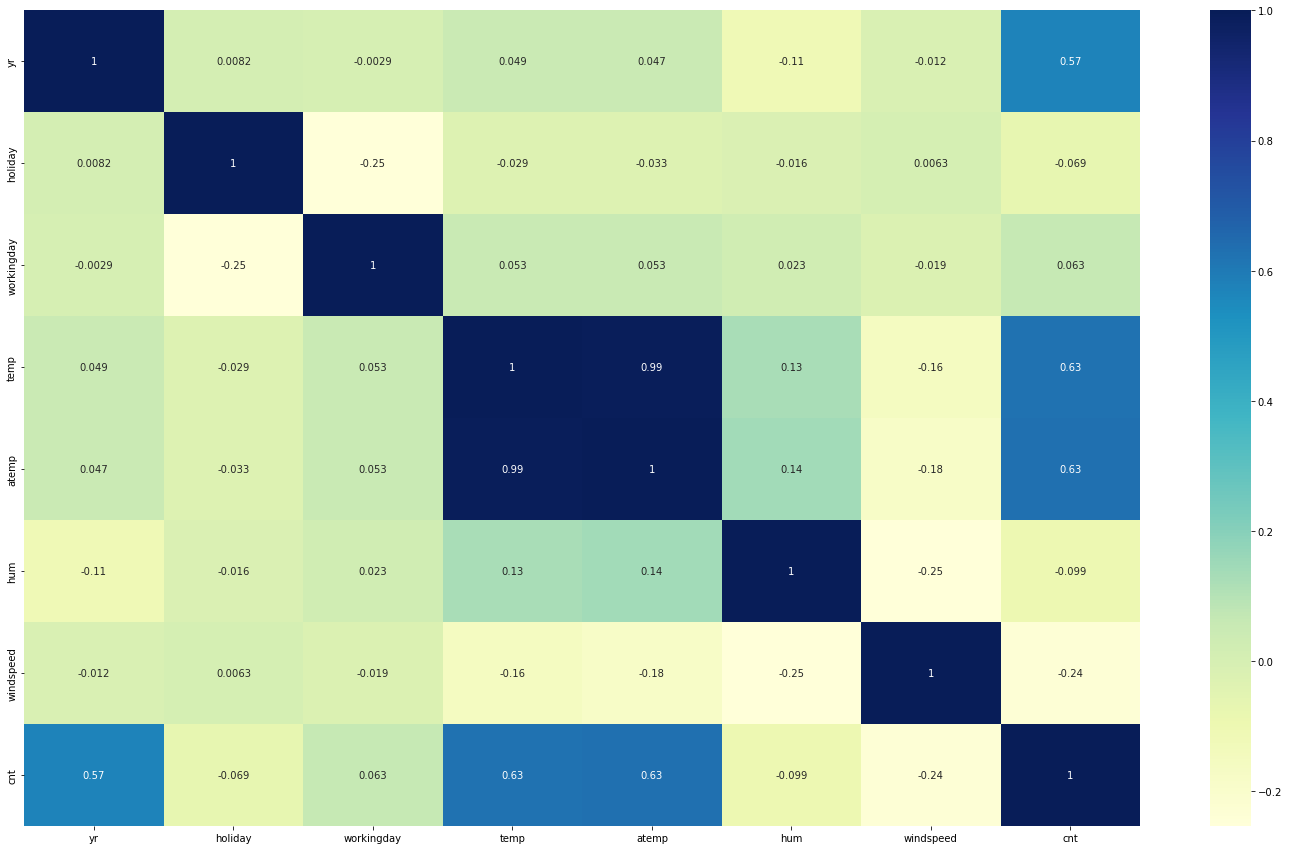

In [26]:
# checking the correlation coefficients to see which variables are highly correlated. 

plt.figure(figsize = (25,15))
sns.heatmap(bike_share.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### Observations:
The heatmap depicts the variables that are multicollinear in nature, and the variable that have high collinearity with the target variable.
this map can be referred further while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model

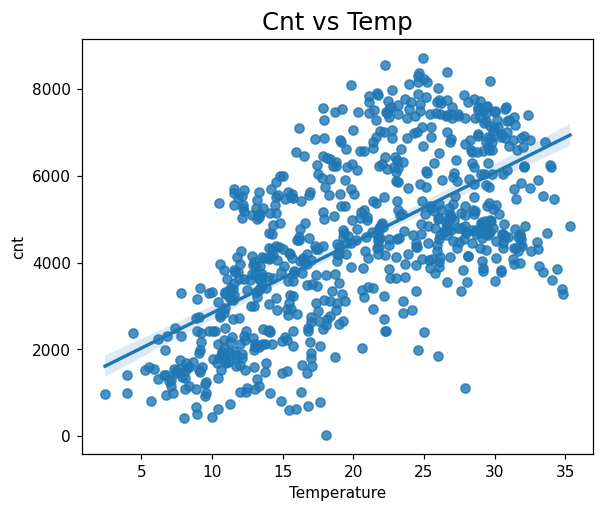

In [27]:
# Cnt vs Temp
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike_share,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

##### Observation:
- Demand for bikes is positively correlated to temp.
- cnt is linearly increasing with temp indicating linear relation.

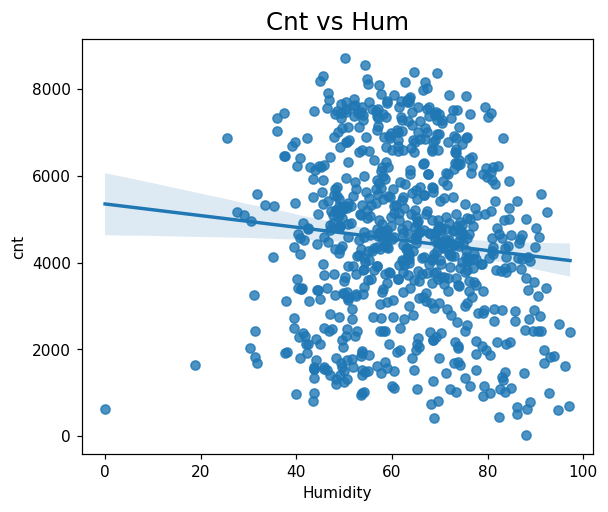

In [28]:
# Cnt vs Hum
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike_share,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

##### Observation:
 - Hum values are more scattered around.
 - cnt decreasing with increase in humidity.

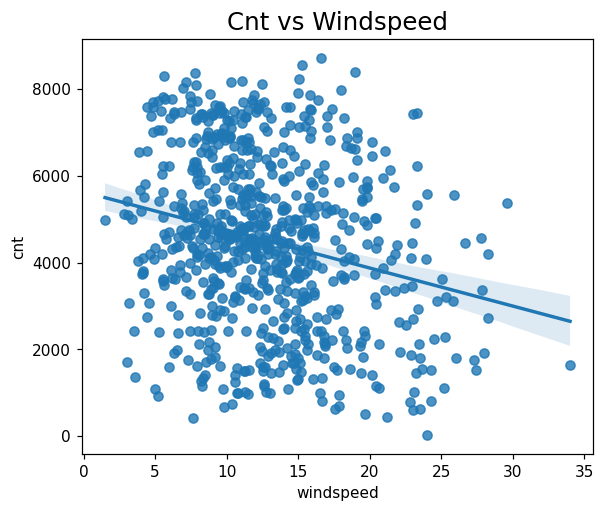

In [29]:
# Cnt vs Windspeed
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike_share,y="cnt",x="windspeed")
plt.show()

##### Observation:
 - windspeed values are more scattered around.
 - cnt decreasing with increase in windspeed.

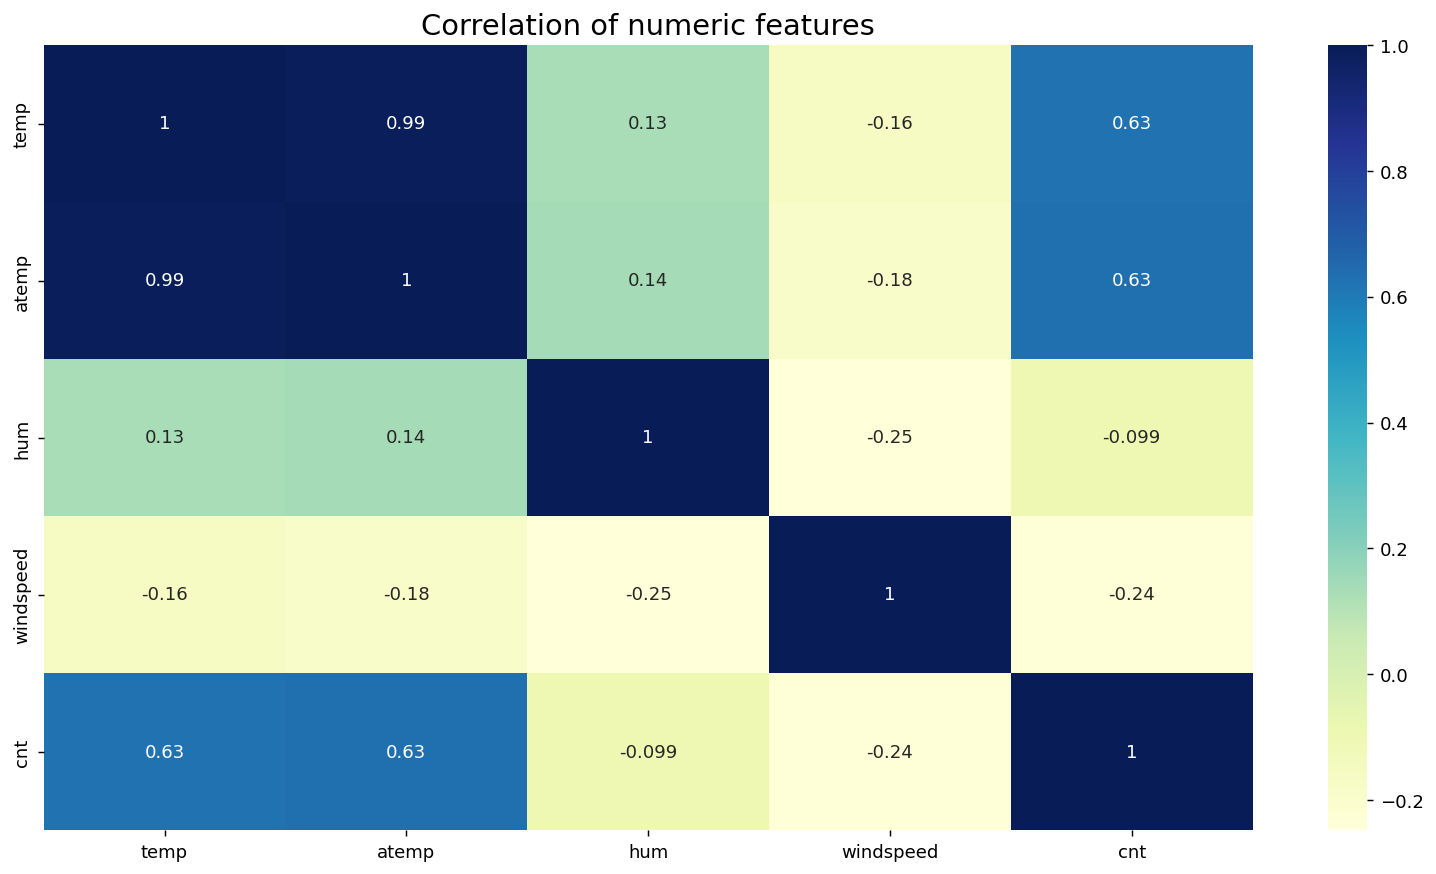

In [30]:
# Correlation of numeric Variables
num_var = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bike_share[num_var].corr(),annot= True,cmap="YlGnBu")
plt.show()

###### Observations
- Temp and Atemp are highly correlated, one of them can be removed, keep them for further analysis.
- Temp and Atemp also have high correlation with cnt variable.

In [31]:
bike_share.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 4 : Data Preparation for Linear Regression

Create dummy variables for all categorical variables

In [32]:
# Creating dummy variables for "season","mnth","weekday"
bike_share = pd.get_dummies(data=bike_share,columns=["season","mnth","weekday"],drop_first=True)
bike_share.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,moderate,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,good,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,good,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,good,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [33]:
# Creating Dummy variable for "weathersit"
bike_share = pd.get_dummies(data=bike_share,columns=["weathersit"])
bike_share.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [34]:
#Printing columns after creating dummies
bike_share.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

## Step 5 : Building Model

### 5.1 Splitting The Data

- Splitting the data to TRAIN and TEST (70:30 ratio)
- using train_test_split method from sklearn package for this

In [35]:
# Check the shape before spliting
bike_share.shape

(730, 31)

In [36]:
# Check the info before spliting
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_jul             730 non-null    uin

In [37]:
# specify 'random_state' so that the train and test data set always have the same rows, respectively
# y to contain only target variable
y=bike_share.pop('cnt')

#X is all remainign variable also our independent variables
X=bike_share

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Check independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [39]:
# Check training data
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,13.188347,16.22460,62.0417,10.250129,0,0,1,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,15.716653,19.38040,70.9583,12.708493,0,0,1,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,26.035000,30.08270,49.4583,20.458450,0,1,0,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,26.957500,29.95665,79.3750,4.458569,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [40]:
# Check testing data
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
468,1,0,0,20.295000,24.39980,50.2917,12.791439,0,1,0,...,0,0,1,0,0,0,0,0,1,0
148,0,0,0,27.367500,30.77750,81.8750,14.333846,0,1,0,...,0,0,0,1,0,0,0,0,1,0
302,0,0,0,13.085847,16.06645,62.3750,11.833339,0,0,1,...,0,0,0,1,0,0,0,0,1,0
355,0,0,1,17.356653,21.30605,75.7500,3.167425,1,0,0,...,0,0,0,0,1,0,0,0,0,1
515,1,0,1,27.880000,31.56645,49.2917,13.083693,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
# Check shape of train and test data
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### 5.2 Scaling of continuous variables

- making all features in same scale to for interpratation

In [42]:
# scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

# Use of Normalized scaler to scale
scaler = MinMaxScaler()

# Fit and transform training set
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [43]:
# Stats from Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,0,0,1,0,0,1


### 5.3 Building a Model using RFE 

##### Use RFE to eliminate some columns

In [45]:
# Building a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
# Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [47]:
# Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 16),
 ('mnth_jul', False, 2),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 5),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 7),
 ('mnth_sept', False, 3),
 ('weekday_mon', False, 14),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [48]:
# Defining a Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [49]:
# Defining a Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [50]:
# Print Columns selected by RFE and Use these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [51]:
# Features rejected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [52]:
# Using all 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [53]:
X_train_rfe.shape

(511, 15)

### Model 1 - Using all variables selected by RFE

In [54]:
#Selected columns for Model 1 - all columns selected by RFE
X_col1 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(X_col1)
get_vif(X_col1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.52e-183
Time:                        19:09:16   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

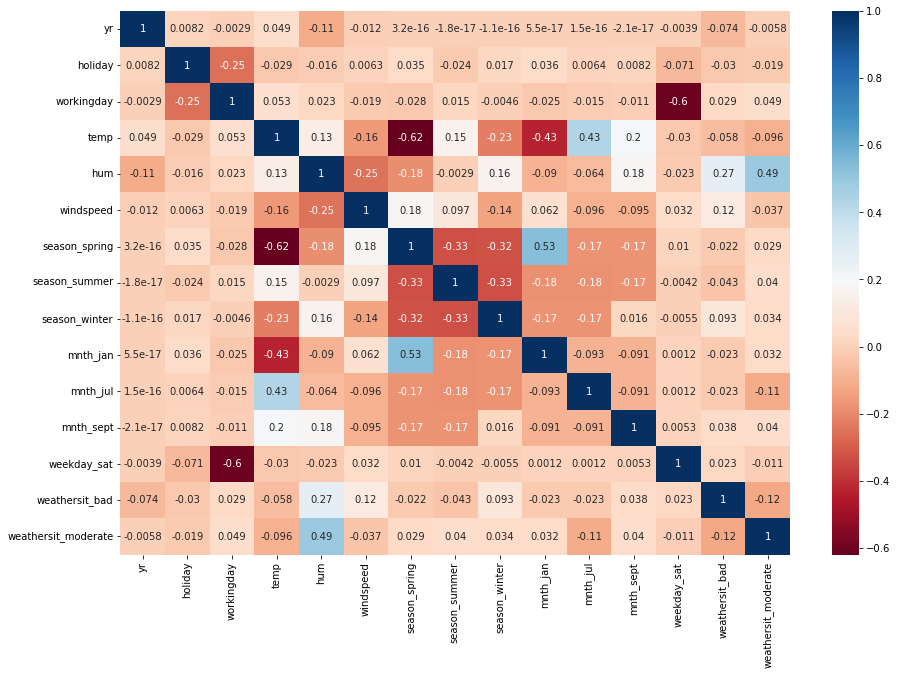

In [55]:
# Checking the correlation of features selected by RFE with target column and impact of different features on target
plt.figure(figsize = (15,10))
sns.heatmap(bike_share[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='RdBu', annot=True)
plt.show()

### Model 2 - Dropping the variable "mnth_jan"

In [56]:
# the variable mnth_jan has negative coefficient and is insignificant due to high p-value
X_col2 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(X_col2)
get_vif(X_col2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.59e-184
Time:                        19:09:19   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

### Model 3 - Dropping the variable "hum"

Most of the columns have p-value > .05 so need to check VIFs

In [57]:
# the variable "hum" has negative coefficient and is insignificant due to high p-value
X_col3 = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(X_col3)
get_vif(X_col3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.46e-181
Time:                        19:09:19   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

### Model 4 - Dropping the variable "holiday"

In [58]:
# the variable holiday has negative coefficient and is insignificant due to high p-value
X_col4 = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(X_col4)
get_vif(X_col4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.56e-182
Time:                        19:09:19   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

### Model 5 - Dropping the variable "mnth_jul "

In [59]:
# the variable mnth_jul has negative coefficient and is insignificant due high p-value
X_col5 = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(X_col5)
get_vif(X_col5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.57e-182
Time:                        19:09:19   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

### Model 6 - Using Highly correlated variables

In [60]:
# Replace July with spring as both were highly correlated

X_col6 = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(X_col6)
get_vif(X_col6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           3.93e-97
Time:                        19:09:19   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

### Model 7 - Using Highly correlated variables (Windspeed, temp)

In [61]:
# Removing windspeed with spring as windspeed was highly correlated with temp
X_col7 = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(X_col7)
get_vif(X_col7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.90e-146
Time:                        19:09:19   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4162.3897    

### Model 8 - Using the dropped values

In [62]:
# using the weekend "Sunday" was dropped during RFE instead of Saturday.

X_col8 = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(X_col8)
get_vif(X_col8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.32e-145
Time:                        19:09:19   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4479.8636    

### Model 9 - Adding and removing required variables 

In [63]:
# adding temp and removed 'season_summer' and 'workingday'
X_col9 = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(X_col9)
get_vif(X_col9)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.33e-179
Time:                        19:09:19   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

##### Observations:
 - VIF seems to be accepted mostly. 
 - p-value for all the features is almost 0.0 and R2 is 0.821 
 - Model 9 seems to be most efficient as it has all important statistics high (R-square, Adjusted R-squared and F-statistic),      along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted    R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed      from this model.

## Step 6: Build the model using sklearn

In [64]:
# Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [65]:
cols_sk = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

# Build a model with the above columns
lr = build_model_sk(X_train[cols_sk],y_train)
print(lr.intercept_,lr.coef_)

1849.3111141436225 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


# Step 7 : Model Evaluation

##### 1. Residual Analysis

In [66]:
y_train_pred = lr.predict(X_train[cols_sk])

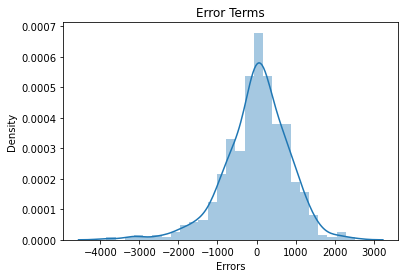

In [67]:
#  Histogram Plot of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    
plot_res_dist(y_train, y_train_pred)

Errors are normally distribured with mean 0

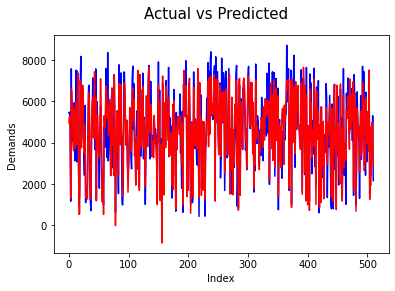

In [68]:
# Actual Model vs Predicted Model
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result depicts similar pattern which means the predicted model is acceptable

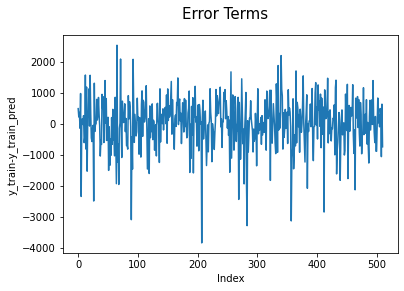

In [69]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

It seems the error terms are independent of each other

In [70]:
# Check R-squared Value
r2_score(y_train,y_train_pred)

0.8185359364498817

R2 is similar to obtained from final model

#### 2. Linearity Check

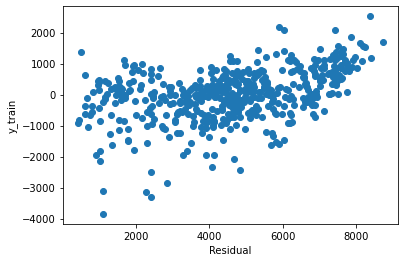

In [71]:
# scatter plot for the Linearity check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### 3. Values Prediction for test data set

In [72]:
# Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

# Test data to be transformed, not fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [73]:
# Columns from the final model
cols_model = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols_model])

#### 4. R-Squared value for test predictions

In [74]:
# Finding the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8159036088393238

#### 5. Homoscedacity

R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence the  model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

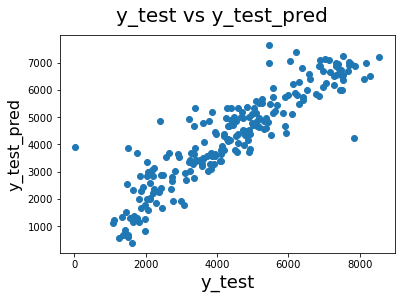

In [75]:
# Plotting y_test Vs  y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)        
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16)

It is observed that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes

#### 6. Test vs Predicted test values

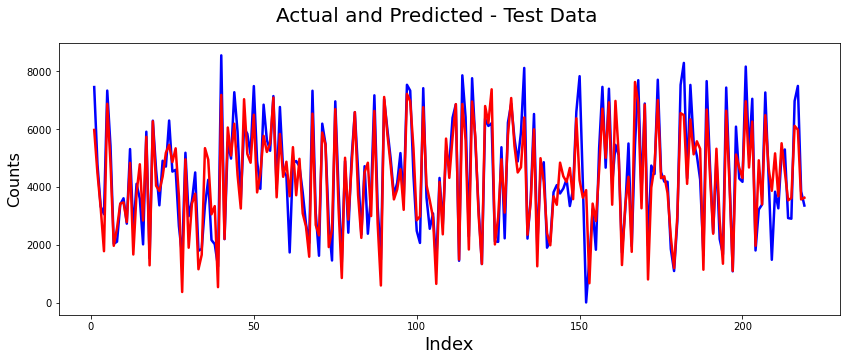

In [76]:
# Defining a Function to plot Actual vs Predicted
# Pass Actual and PRedicted values as input along with the scale and Title to indicate the data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)             
    plt.xlabel('Index', fontsize=18)                               
    plt.ylabel('Counts', fontsize=16)
    
    
# Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

predictions for test data is close to actuals

### Intrepretation of the Model

Interpreting the RFE with Manual model results for the imputation

In [77]:
bike_share.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [78]:
# Rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols_final = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols_final)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.33e-179
Time:                        19:09:22   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

#### Interepretation/ Analysis of Final Model:

Analysing the above model results to the following:

- Company should focus on expanding business during Spring season.
- Company should focus on expanding business during September Month.
- Based on previous data it is expected to have a increment in number of users once situation comes back to normal, as compared   to 2019.
- Expectations of less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having   business impact.
- When the situation comes back to normal, the company should come up with new promotional offers during spring when the         weather is favoruable and also advertise a little for September as this is when business would be at its best.


##### Conclusion:

Significant variables to predict the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)